In [41]:
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv('exams.csv')

In [43]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [44]:
# check the shape( rows and columns)
df.shape

(1000, 8)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [46]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [47]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [48]:
#checking the datatypes of all the columns
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [49]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [50]:
# Writing score of the people count
df["writing score"].value_counts()

78    32
72    32
74    31
70    31
63    29
      ..
28     1
15     1
27     1
30     1
23     1
Name: writing score, Length: 74, dtype: int64

<AxesSubplot:>

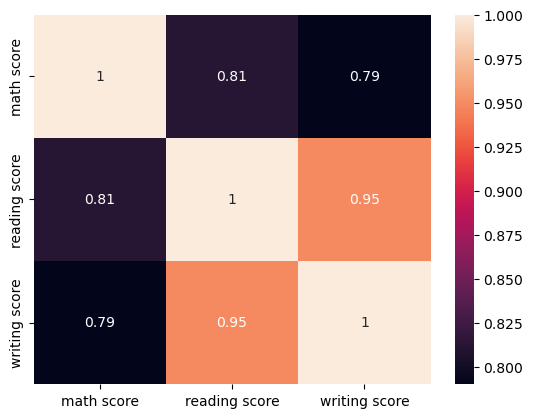

In [51]:
#corelation
import seaborn as sns
sns.heatmap(data=df.corr(),annot=True)

<AxesSubplot:ylabel='Frequency'>

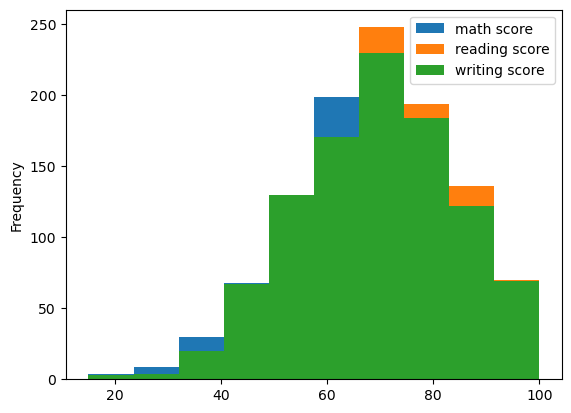

In [81]:
df.plot(kind='hist')

In [52]:
import matplotlib.pyplot as plt

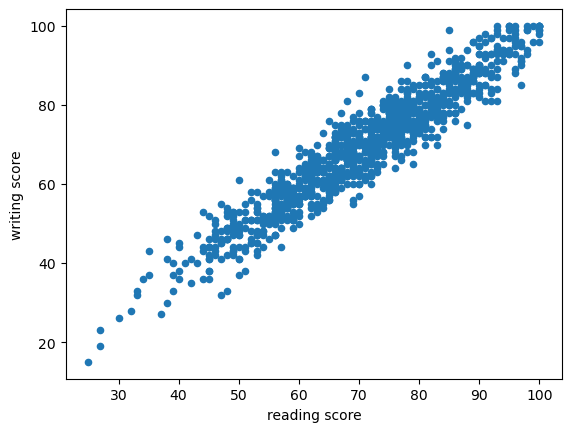

In [53]:
#visualize numerical data
df.plot.scatter(x='reading score',y='writing score')
plt.show()

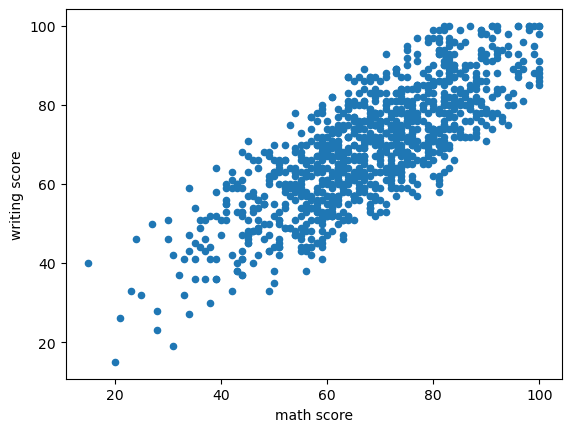

In [54]:
df.plot.scatter(x='math score',y='writing score')
plt.show()

<AxesSubplot:xlabel='gender', ylabel='writing score'>

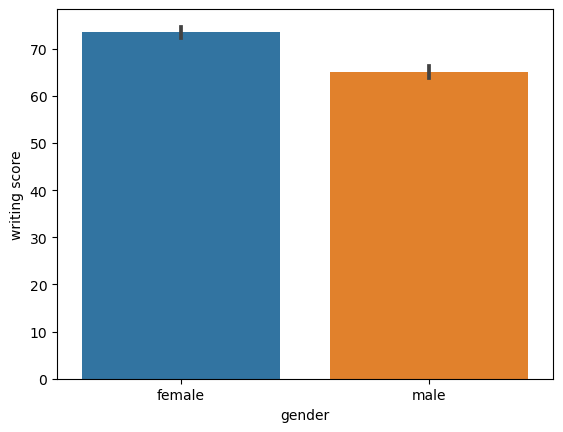

In [55]:
# visualize categorical data
sns.barplot(data=df,x='gender',y='writing score')

In [56]:
#in the graph we see female had a  writing score greater than male
df.groupby('gender')['writing score'].mean().to_frame().reset_index()

,gender,writing score
0,female,73.439024
1,male,64.976378


<AxesSubplot:xlabel='race/ethnicity', ylabel='writing score'>

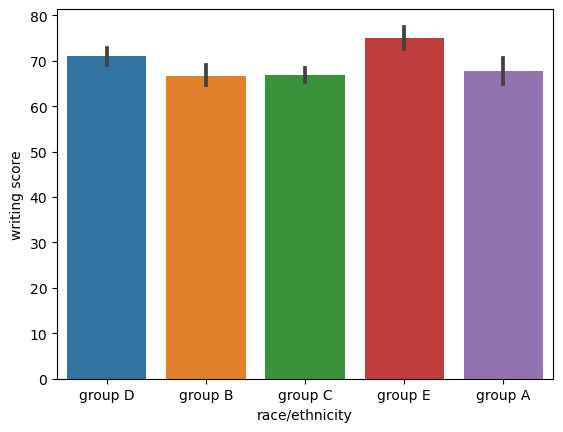

In [57]:
sns.barplot(data=df,x='race/ethnicity',y='writing score')

<AxesSubplot:xlabel='parental level of education', ylabel='writing score'>

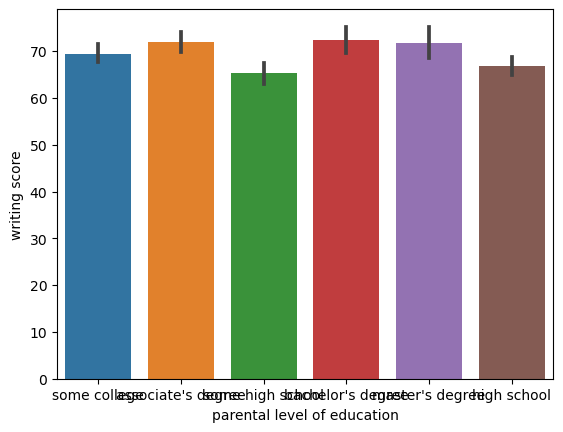

In [58]:
sns.barplot(data=df,x='parental level of education',y='writing score')

<AxesSubplot:xlabel='lunch', ylabel='writing score'>

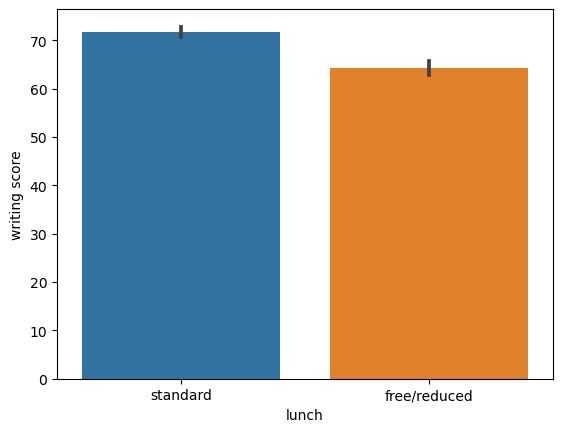

In [59]:
sns.barplot(data=df,x='lunch',y='writing score')

<AxesSubplot:xlabel='test preparation course', ylabel='writing score'>

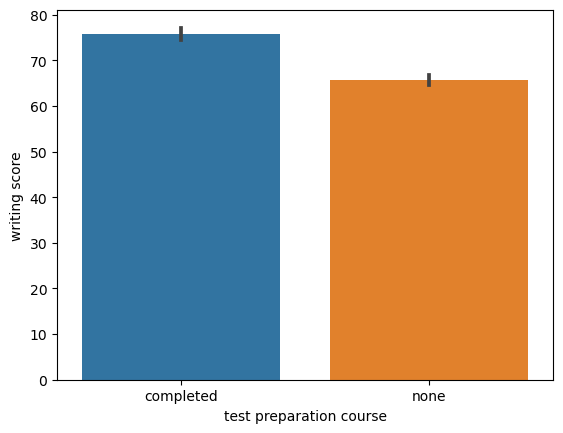

In [60]:
sns.barplot(data=df,x='test preparation course',y='writing score')

In [61]:
# pre process
df.isna().count().to_frame()

,0
gender,1000
race/ethnicity,1000
parental level of education,1000
lunch,1000
test preparation course,1000
math score,1000
reading score,1000
writing score,1000


In [62]:
# Encoding
numerical_data=['math score','reading score']
categorical_data=['gender','parental level of education','lunch','test preparation course']

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [64]:
x=df[numerical_data+categorical_data]
y=df['writing score']
x

,math score,reading score,gender,parental level of education,lunch,test preparation course
0,59,70,female,some college,standard,completed
1,96,93,male,associate's degree,standard,none
2,57,76,female,some college,free/reduced,none
3,70,70,male,some college,free/reduced,none
4,83,85,female,associate's degree,standard,none
...,...,...,...,...,...,...
995,77,77,male,some college,standard,none
996,80,66,male,some college,standard,none
997,67,86,female,high school,standard,completed
998,80,72,male,high school,standard,none


In [65]:
colTr=ColumnTransformer(transformers=[('encode',OneHotEncoder(),categorical_data)],remainder='passthrough')
x=colTr.fit_transform(x)

In [66]:
x1=x
df1 = pd.DataFrame(x1)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,59.0,70.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,96.0,93.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,76.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,70.0,70.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,83.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,77.0,77.0
996,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,80.0,66.0
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,67.0,86.0
998,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,80.0,72.0


In [67]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

In [68]:
#x_train

In [69]:
# model training
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [70]:
regression.fit(x_train,y_train)

LinearRegression()

In [71]:
from sklearn.metrics import r2_score
x_train_predict=regression.predict(x_train)
r2_score(y_train,x_train_predict)
x_test_predict=regression.predict(x_test)


In [72]:
r2_score(y_train,x_train_predict)


0.9400132149420484

In [73]:
r2_score(y_test,x_test_predict)


0.9389969986021164

In [77]:
# Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(max_depth=7)
DT_reg = regressor.fit(x_train,y_train)



In [78]:
DT_reg

DecisionTreeRegressor(max_depth=7)

In [79]:
print(DT_reg.score(x_train,y_train))
print(DT_reg.score(x_test,y_test))


0.9543790437658188
0.8964456814484837
